In [77]:
from sympy import *
from sympy.matrices import *
from sympy.plotting import plot
init_printing(use_latex=true)

t = symbols('t')
M,l,g = symbols("M,l,g")
th = Function('\\theta')
tau = symbols('\\tau')
I = M*l**2

In [80]:
k = (1/2)*I*(th(t).diff(t))**2
u = M*g*l*sin(th(t))
L = k - u

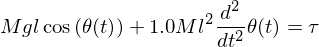

In [81]:
ed = Eq(diff(diff(L, th(t).diff(t)), t) - diff(L, th(t)), tau)
ed

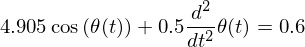

In [82]:
edn = ed.subs({M:0.5, l:1, g:9.81, tau:0.6})
edn

In [98]:
cini = {th(0): 0, th(t).diff(t).subs(t, 0): 2}
#dsolve(edn, th(t), ics=cini)

$$ ML^2\ddot{\theta} + MgL\cos(\theta) = \tau $$

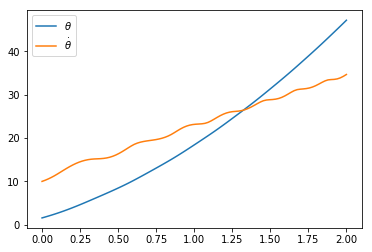

In [153]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
%matplotlib inline

def robot_1gdl(t, y):
    M,L,tau,g = 2.5, 1, 30, 9.81
    x1 = y[1]
    x2 = tau/(M*L**2) - (g/L)*np.cos(y[0])
    return x1,x2

sol = solve_ivp(robot_1gdl, [0,2], [np.pi/2,10], t_eval=np.linspace(0,2,100))
plt.plot(sol.t, sol.y[0], label="$\\theta$")
plt.plot(sol.t, sol.y[1], label="$\\dot{\\theta}$")
plt.legend();